## Exercise
Every year, the city of Munich updates a data set that shows visitor numbers, drinking mood and Hendl consumption.

https://opendata.muenchen.de/en/dataset/oktoberfest/resource/e0f664cf-6dd9-4743-bd2b-81a8b18bd1d2

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Oktoberfest.csv")

### Task 1
Create **two different visualizations** and display them **side by side** using subplots. The goal is to analyze historical Oktoberfest data and explore possible relationships between key variables.

**Beer Price Development**  
- Create a **line plot** that shows how **beer prices** have changed over the years.  
- Make sure to label the axes and add a **title** to the plot.  

**Relationship Between Beer and Roasted Chicken Consumption**  
- Create a **scatter plot** that examines the relationship between **beer consumption and roasted chicken consumption**.  
- Add a **regression line** to highlight possible trends.  
- Ensure the axes are properly labeled and add a **title** to the plot.  

**Subplots**  
- Display both visualizations **side by side** using **subplots**.  
- Adjust the layout so that the figures are **well-proportioned and easy to read**.  


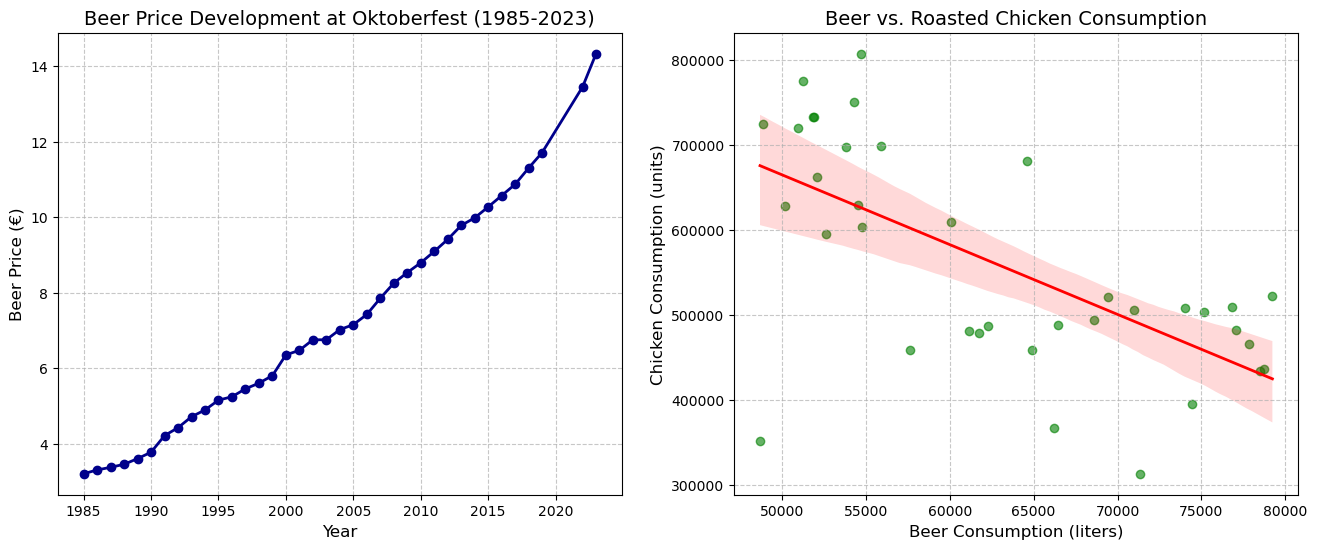

In [8]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(df['jahr'], df['bier_preis'], marker='o', color='darkblue', linewidth=2)
plt.title('Beer Price Development at Oktoberfest (1985-2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Beer Price (€)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(1985, 2025, 5))


plt.subplot(1, 2, 2)
sns.regplot(x=df['bier_konsum'], y=df['hendl_konsum'], 
            scatter_kws={'color': 'green', 'alpha': 0.6}, 
            line_kws={'color': 'red', 'linewidth': 2})
plt.title('Beer vs. Roasted Chicken Consumption', fontsize=14)
plt.xlabel('Beer Consumption (liters)', fontsize=12)
plt.ylabel('Chicken Consumption (units)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

### Task 2: Analyzing Beer and Roasted Chicken Prices vs. Consumption
Analyze how **beer and roasted chicken prices** have evolved over time and how this relates to **beer consumption** at the Oktoberfest.

**Plot Beer and Roasted Chicken Prices Over Time**  
- Create a **line plot** showing the **beer and roasted chicken prices** over the years.  
- Use **distinct colors and markers** to differentiate both price trends.  
- Label the axes properly and add a **legend** to indicate which line corresponds to which price.

**Overlay Beer Consumption on a Secondary Y-Axis**  
- Use a **secondary Y-axis** (`twinx()`) to plot the **beer consumption** over time.  
- Ensure that the **scales on both axes are appropriate** and clearly distinguishable.
- Add a **legend** to show the corresponding label.

**Final Touches**  
- Give the visualization a **clear title** and adjust gridlines to enhance readability.  
- Make sure that **both Y-axes are correctly labeled**, indicating units (€/hl).  


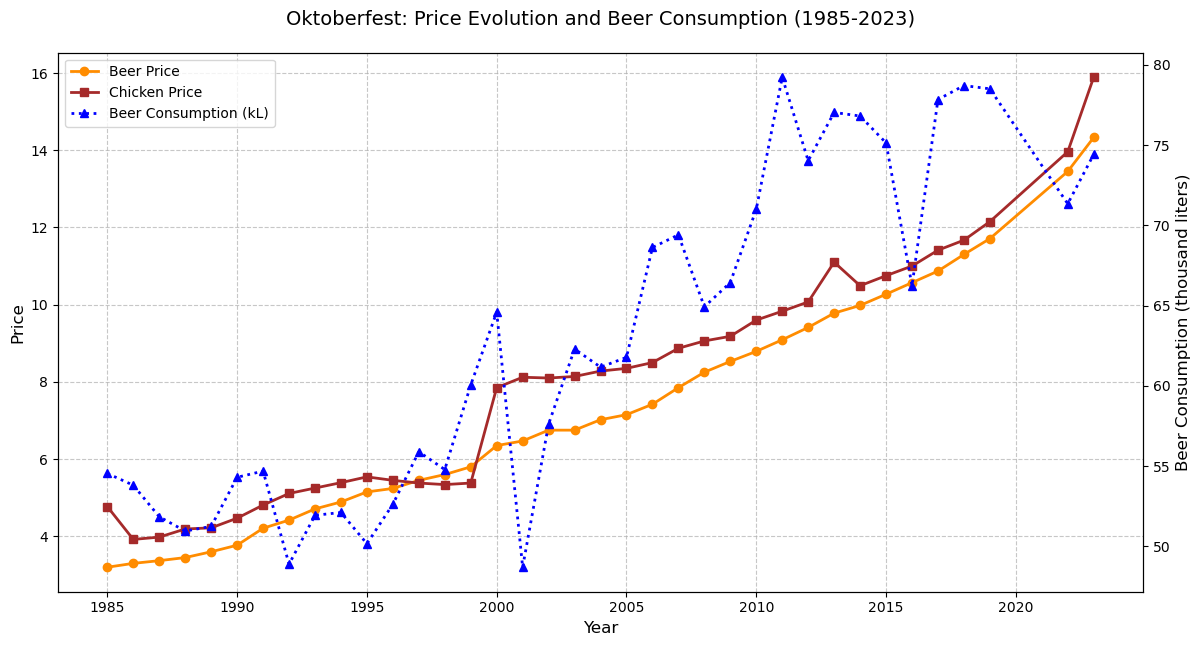

In [10]:
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.plot(df['jahr'], df['bier_preis'], 
         marker='o', color='darkorange', linewidth=2, 
         label='Beer Price')

ax1.plot(df['jahr'], df['hendl_preis'], 
         marker='s', color='brown', linewidth=2, 
         label='Chicken Price')


ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Price', fontsize=12)
ax1.set_title('Oktoberfest: Price Evolution and Beer Consumption (1985-2023)', 
              fontsize=14, pad=20)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.set_xticks(np.arange(1985, 2025, 5))

ax2 = ax1.twinx()
ax2.plot(df['jahr'], df['bier_konsum']/1000, 
         marker='^', color='blue', linewidth=2, 
         linestyle=':', label='Beer Consumption (kL)')
ax2.set_ylabel('Beer Consumption (thousand liters)', fontsize=12)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, 
           loc='upper left', fontsize=10)

plt.show()

### Task 3: Visualizing the Relationship Between Beer Price, Visitors, and Beer Consumption
**Create a Bubble Chart**  
- Generate a **scatter plot** with:  
  - **Total visitors (in millions) on the X-axis**  
  - **Beer price (in €) on the Y-axis**  
- Each point should **represent a year**, so color-code the points by year (`hue` parameter).

**Represent Beer Consumption with Bubble Size**  
- The **bubble size should reflect beer consumption** (larger bubbles for higher beer consumption).  
- Adjust the scaling so that differences in consumption are clearly visible but not overwhelming.

**Final Touches**  
- Use **circular markers (`marker="o"`)** to ensure a clean and readable plot.  
- Label both axes properly and add a **title**.  
- Include a **legend** that differentiates the years.
- Apply **aesthetic improvements**, such as adjusting transparency (`alpha`) and adding gridlines for readability.


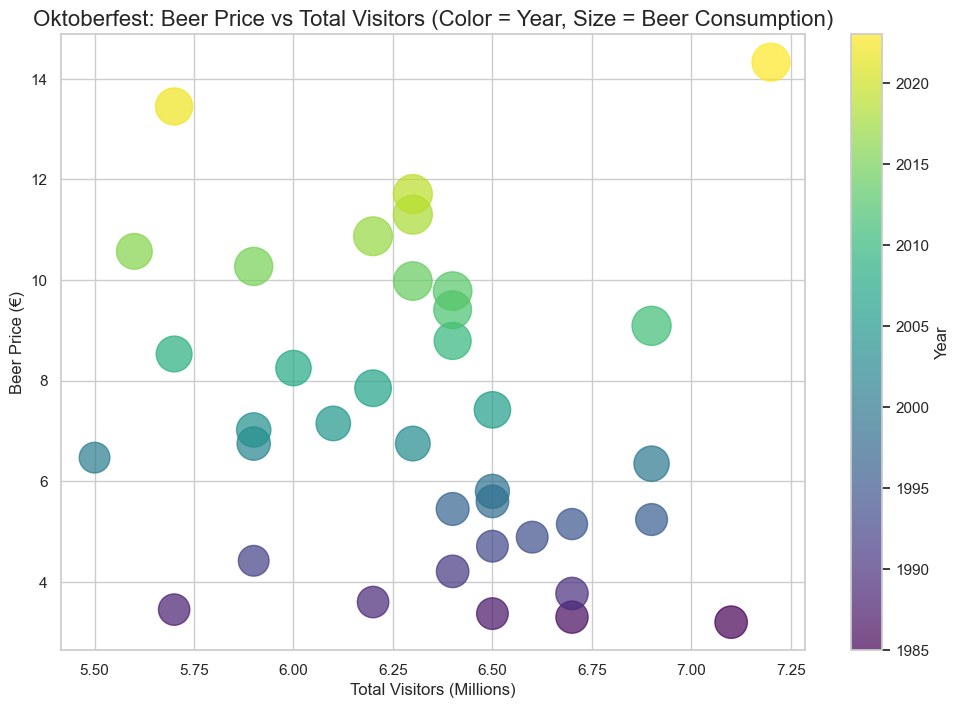

In [40]:
df['bier_konsum_scaled'] = df['bier_konsum'] / 100  # Scale for bubble size

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))

scatter = plt.scatter(
    df['besucher_gesamt'],
    df['bier_preis'],
    c=df['jahr'],  
    s=df['bier_konsum_scaled'], 
    cmap='viridis',
    alpha=0.7,
    marker='o')

cbar = plt.colorbar(scatter)
cbar.set_label('Year')

plt.title("Oktoberfest: Beer Price vs Total Visitors (Color = Year, Size = Beer Consumption)", fontsize=16)
plt.xlabel("Total Visitors (Millions)", fontsize=12)
plt.ylabel("Beer Price (€)", fontsize=12)
plt.grid(True)
plt.show()